# 1. SABR Model 

In [3]:
import numpy as np
import plotly
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [1]:
alpha = 0.2 #initial volatility 
beta = 0.5 #elasticity parameter
nu = 0.1 #vol of vol 
rho = -0.3 #correlation between the two brownian motion 
fwd = 100

In [5]:
T = 1.0
steps = 252
dt = T / steps
time_grid = np.linspace(0, T, steps + 1)
fwd = 110

In [ ]:
# Simulation of Brownian
W_1 = np.random.randn(steps) * (np.sqrt(T/steps))
Z = np.random.randn(steps) *(np.sqrt(T/steps))
W_2 = rho*W_1 +  np.sqrt(1-rho**2)*Z

#Simulation of sigma 
sigma = alpha * np.exp(-(1/2)*nu**2*T/steps + nu*np.cumsum(W_2))
#Simulation of forward
Fwd = np.zeros(steps + 1)
Fwd[0] = fwd



In [ ]:
z = (nu/alpha) * (fwd*strike)**((1-beta)/2) * np.log(fwd/strike)
x_z = np.log((np.sqrt(1 -2*z*rho + z**2) + z + rho)/(1-rho))

In [6]:
sigma_SABR = (alpha/(fwd*strike)**((1-beta)/2))*(z/x_z)* (1 + T * ((1-beta)**2/24) * (alpha**2/(fwd*strike)**(1-beta)) + (1/4) * (alpha*beta*rho*nu)/((fwd*strike)**((1-beta)/2)) + ((2-3*rho**2)*(nu**2))/24)

In [18]:
df  = pd.DataFrame(columns=['fwd','sigma'])
#df['fwd'] = 1
df['sigma'] = alpha * np.exp(-(1/2)*mu**2*T/steps + mu*np.cumsum(W_2))
df

,fwd,sigma
0,NaN,0.049902
1,NaN,0.049818
2,NaN,0.049868
3,NaN,0.049860
4,NaN,0.049921
...,...,...
9995,NaN,0.053415
9996,NaN,0.053348
9997,NaN,0.053396
9998,NaN,0.053340


In [19]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index,y = df['fwd']))
fig.add_trace(go.Scatter(x=df.index,y = df['sigma']))
fig.show()


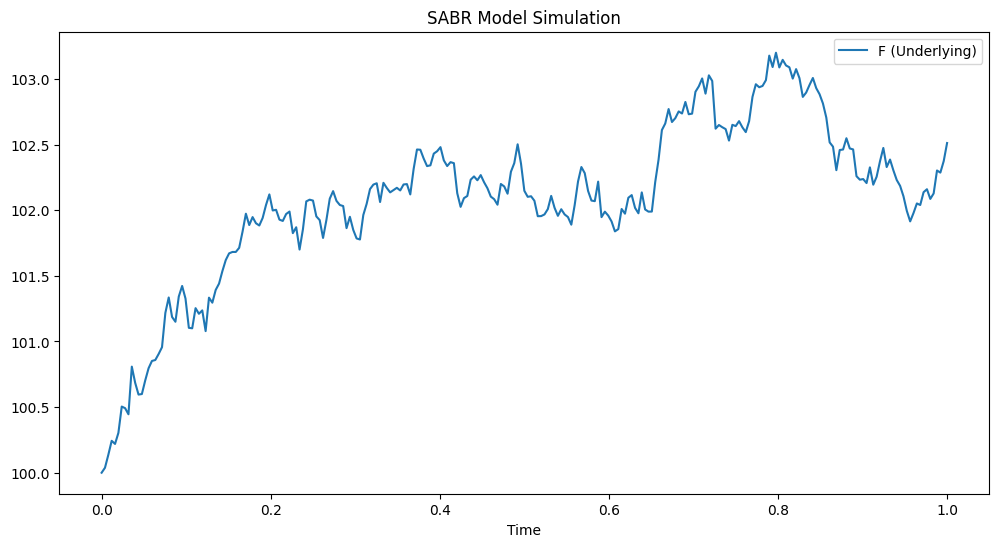

In [21]:


# SABR model parameters
F0 = 100.0        # Initial value of the underlying
sigma0 = 0.2      # Initial volatility
beta = 0.5        # Elasticity parameter (0 <= beta <= 1)
nu = 0.3          # Volatility of volatility (vol-of-vol)
rho = -0.4        # Correlation between the two Brownian motions

# Pre-allocate arrays for F (underlying) and sigma (volatility)
F = np.zeros(N + 1)
sigma = np.zeros(N + 1)
F[0] = F0
sigma[0] = sigma0

# Simulation loop
for t in range(N):
    # Generate the Brownian increments:
    # epsilon_sigma will be used to update sigma exactly
    epsilon_sigma = np.random.normal()
    # epsilon_indep is independent for generating the correlated increment for F
    epsilon_indep = np.random.normal()
    
    # Correlated increment for F:
    dW = rho * np.sqrt(dt) * epsilon_sigma + np.sqrt(1 - rho**2) * np.sqrt(dt) * epsilon_indep
    
    # Exact simulation for sigma (volatility)
    sigma[t+1] = sigma[t] * np.exp(nu * np.sqrt(dt) * epsilon_sigma - 0.5 * nu**2 * dt)
    
    # Euler-Maruyama discretization for F (the underlying)
    F[t+1] = F[t] + sigma[t] * (F[t] ** beta) * dW

# Plot the simulation paths
plt.figure(figsize=(12, 6))
plt.plot(time_grid, F, label='F (Underlying)')
plt.xlabel('Time')
plt.legend()
plt.title('SABR Model Simulation')
plt.show()